In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/train.csv", sep=";")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()
#df.isnull().any()
# no missing values anywhere evident from info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
dtype_column_dict = df.columns.to_series().groupby(df.dtypes).groups
dtype_column_dict

{int64: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], object: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']}

In [8]:
dtype_column_dict.keys()

dict_keys([dtype('int64'), dtype('O')])

In [9]:
for x in dtype_column_dict[np.dtype('O')]:
    print(f"Unique values in column '{x}'",df[x].unique())

Unique values in column 'job' ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in column 'marital' ['married' 'single' 'divorced']
Unique values in column 'education' ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in column 'default' ['no' 'yes']
Unique values in column 'housing' ['yes' 'no']
Unique values in column 'loan' ['no' 'yes']
Unique values in column 'contact' ['unknown' 'cellular' 'telephone']
Unique values in column 'month' ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in column 'poutcome' ['unknown' 'failure' 'other' 'success']
Unique values in column 'y' ['no' 'yes']


In [10]:
print("Total number of negative samples: ",df['y'].value_counts()[0])
print("Total number of positive samples: ",df['y'].value_counts()[1])
print("Proportion of positives: ",df['y'].value_counts()[1]/sum(df['y'].value_counts()))

# the dataset seems to be moderately imbalanced

Total number of negative samples:  39922
Total number of positive samples:  5289
Proportion of positives:  0.11698480458295547


In [11]:
df.replace({
    'default'   :{'yes':1, 'no':0},
    'housing'   :{'yes':1, 'no':0},
    'loan'      :{'yes':1, 'no':0},
    'y'         :{'yes':1, 'no':0}
},
inplace=True)

Text(0.5, 1.0, 'Age Distribution for those who OPTED for Term Deposit')

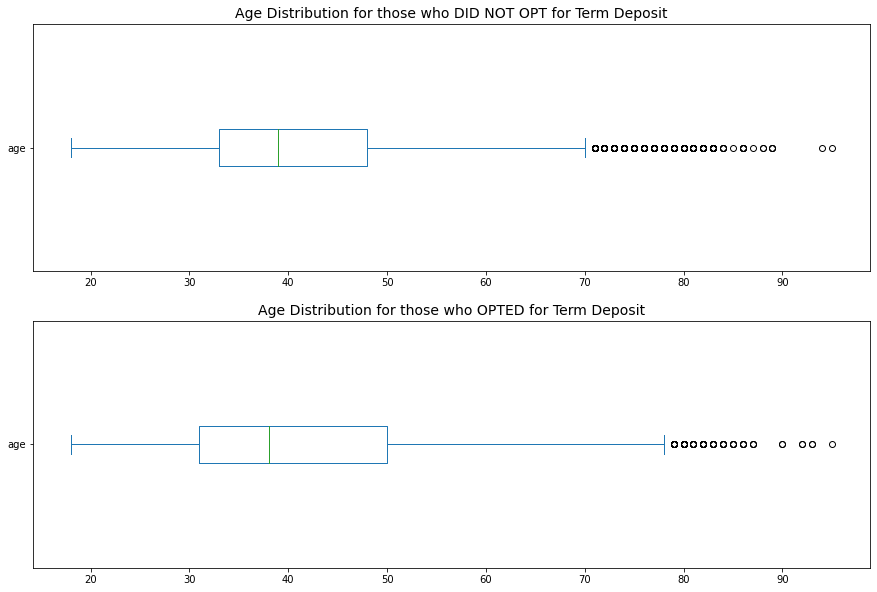

In [12]:
fig, ax = plt.subplots(2,1,figsize = (15,10))

df.loc[df['y']==0,'age'].plot.box(vert = False, ax=ax[0])
ax[0].set_title('Age Distribution for those who DID NOT OPT for Term Deposit', fontsize=14)

df.loc[df['y']==1,'age'].plot.box(vert = False, ax=ax[1])
ax[1].set_title('Age Distribution for those who OPTED for Term Deposit', fontsize=14)

There are certainly outliers in the age for both the categories who opted for and who din't opt for the Term Deposit

In [13]:
df[['balance','y']].groupby(by='y').agg(
    ['count'
    ,'mean'
    ,'min'
    ,('25th Percentile',lambda x: np.percentile(x, 25))
    ,'median'
    ,('75th Percentile',lambda x: np.percentile(x, 75))
    ,'max'
    ]
)

balance                                                                  
    count         mean   min 25th Percentile median 75th Percentile     max
y                                                                          
0   39922  1303.714969 -8019            58.0  417.0          1345.0  102127
1    5289  1804.267915 -3058           210.0  733.0          2159.0   81204

<AxesSubplot:ylabel='Frequency'>

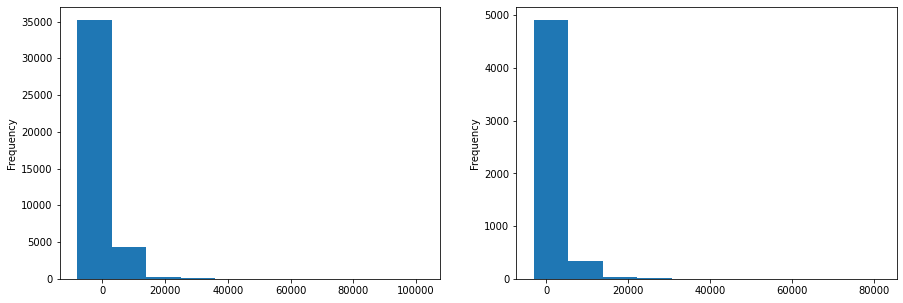

In [14]:
fig, ax = plt.subplots(1,2,figsize = (15,5))
df.loc[df['y']== 0,'balance'].plot.hist(ax=ax[0])
df.loc[df['y']== 1,'balance'].plot.hist(ax=ax[1])

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

In [16]:
for x in dtype_column_dict[np.dtype('O')]:
    if x != 'y':
        le = LabelEncoder()
        encoded_values = np.array(le.fit_transform(df[x])).reshape(-1,1)
        target_values = np.array(df['y']).reshape(-1, 1)
        print(f"chi2 value & P value for {x} and target are: ", chi2(encoded_values, target_values))

chi2 value & P value for job and target are:  (array([182.45226044]), array([1.41257633e-41]))
chi2 value & P value for marital and target are:  (array([29.76606652]), array([4.87449759e-08]))
chi2 value & P value for education and target are:  (array([90.61772256]), array([1.74292216e-21]))
chi2 value & P value for default and target are:  (array([22.31387496]), array([2.31527677e-06]))
chi2 value & P value for housing and target are:  (array([388.94971474]), array([1.4012848e-86]))
chi2 value & P value for loan and target are:  (array([176.51613693]), array([2.79337524e-40]))
chi2 value & P value for contact and target are:  (array([1253.81410931]), array([1.23084479e-274]))
chi2 value & P value for month and target are:  (array([44.32190507]), array([2.78581489e-11]))
chi2 value & P value for poutcome and target are:  (array([104.67747933]), array([1.43725371e-24]))


all the categorical variables shows correlation with the target. Let's explore a bit more on the categorical variables and their impact on target.

    marital  y  count
0  divorced  0   4585
1  divorced  1    622
2   married  0  24459
3   married  1   2755
4    single  0  10878
5    single  1   1912


<AxesSubplot:xlabel='marital'>

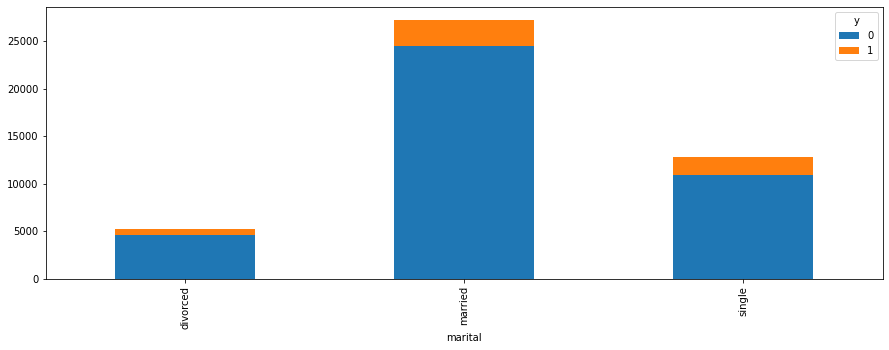

In [42]:
marital_y_df = df.groupby(
    ['marital','y']
    ).agg(
        'count'
        ).reset_index().iloc[:,:3].rename(
            columns={'age':'count'}
            )

print(marital_y_df)

marital_y_df.pivot_table(
    index='marital', columns='y', values='count'
    ).plot.bar(stacked=True, figsize = (15,5))

From above graph, married and single people tend to do term deposit more as compared to divorced.

<AxesSubplot:xlabel='job'>

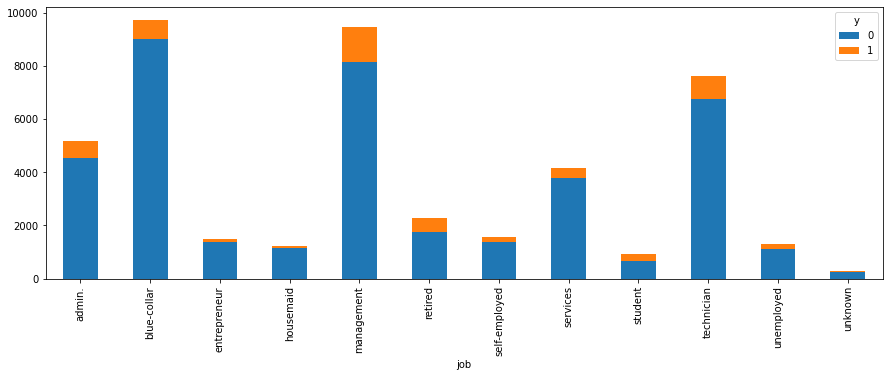

In [44]:
job_y_df = df.groupby(
    ['job','y']
    ).agg(
        'count'
        ).reset_index().iloc[:,:3].rename(
            columns={'age':'count'}
            )
#print(job_y_df)            
job_y_df.pivot_table(
    index='job', columns='y', values='count'
    ).plot.bar(stacked=True, figsize = (15,5))

Entrepreneurs, Housemaids, self-employed, unemployed and unknown show less inclination to opt for a term deposit

<AxesSubplot:xlabel='education'>

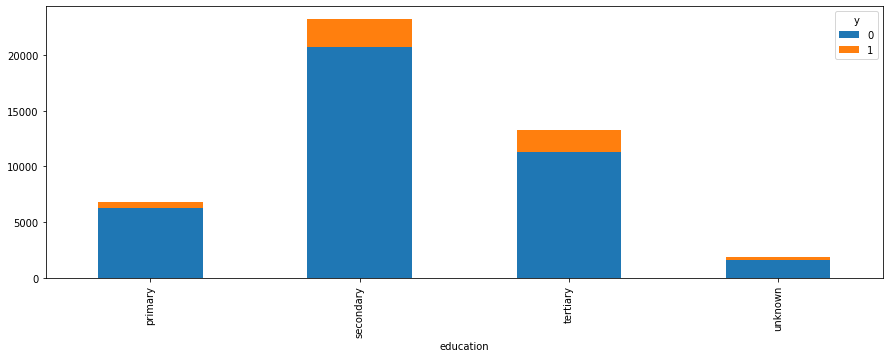

In [48]:
edu_y_df = df.groupby(
    ['education','y']
    ).agg(
        'count'
        ).reset_index().iloc[:,:3].rename(
            columns={'age':'count'}
            )
#print(edu_y_df)            
edu_y_df.pivot_table(
    index='education', columns='y', values='count'
    ).plot.bar(stacked=True, figsize = (15,5))

People with Secondary and Tertiary education are more interested in Term Deposits

   default  y  count
0        0  0  39159
1        0  1   5237
2        1  0    763
3        1  1     52


<AxesSubplot:xlabel='default'>

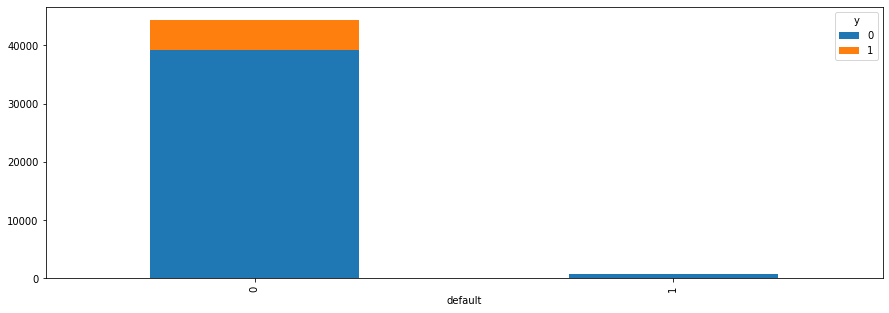

In [49]:
default_y_df = df.groupby(
    ['default','y']
    ).agg(
        'count'
        ).reset_index().iloc[:,:3].rename(
            columns={'age':'count'}
            )
print(default_y_df)            
default_y_df.pivot_table(
    index='default', columns='y', values='count'
    ).plot.bar(stacked=True, figsize = (15,5))

Only handful of People having balance in defaults opt for term deposits. That shouldn't be the target population of banks

   housing  y  count
0        0  0  16727
1        0  1   3354
2        1  0  23195
3        1  1   1935


<AxesSubplot:xlabel='housing'>

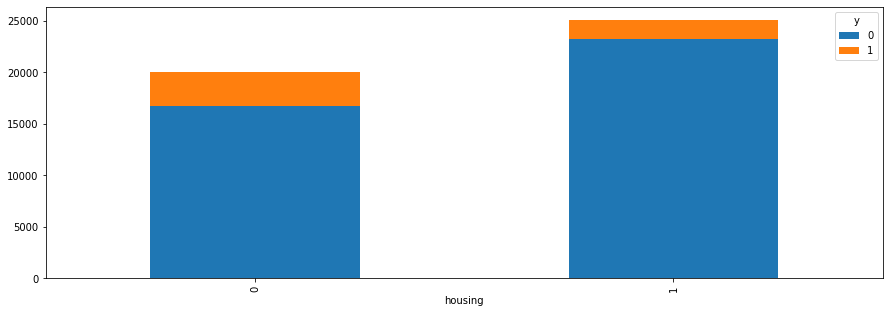

In [51]:
housing_y_df = df.groupby(
    ['housing','y']
    ).agg(
        'count'
        ).reset_index().iloc[:,:3].rename(
            columns={'age':'count'}
            )
print(housing_y_df)            
housing_y_df.pivot_table(
    index='housing', columns='y', values='count'
    ).plot.bar(stacked=True, figsize = (15,5))

No clear cut indication here. Approx same percentage of people with housing loan and without it, tend to opt for term deposit

   loan  y  count
0     0  0  33162
1     0  1   4805
2     1  0   6760
3     1  1    484


<AxesSubplot:xlabel='loan'>

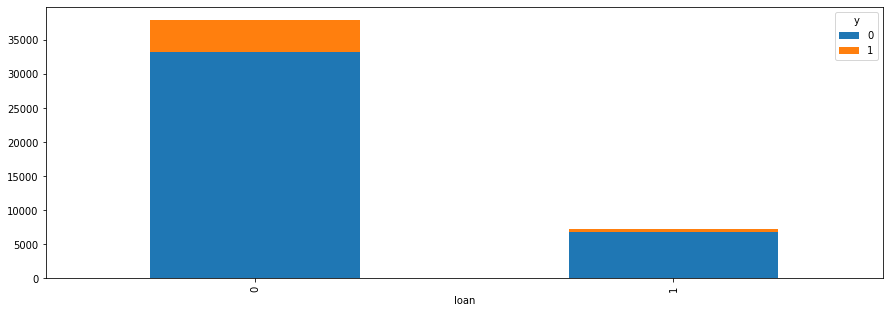

In [52]:
loan_y_df = df.groupby(
    ['loan','y']
    ).agg(
        'count'
        ).reset_index().iloc[:,:3].rename(
            columns={'age':'count'}
            )
print(loan_y_df)            
loan_y_df.pivot_table(
    index='loan', columns='y', values='count'
    ).plot.bar(stacked=True, figsize = (15,5))

People without Personal Loans tend to opt for Term Deposit.

     contact  y  count
0   cellular  0  24916
1   cellular  1   4369
2  telephone  0   2516
3  telephone  1    390
4    unknown  0  12490
5    unknown  1    530


<AxesSubplot:xlabel='contact'>

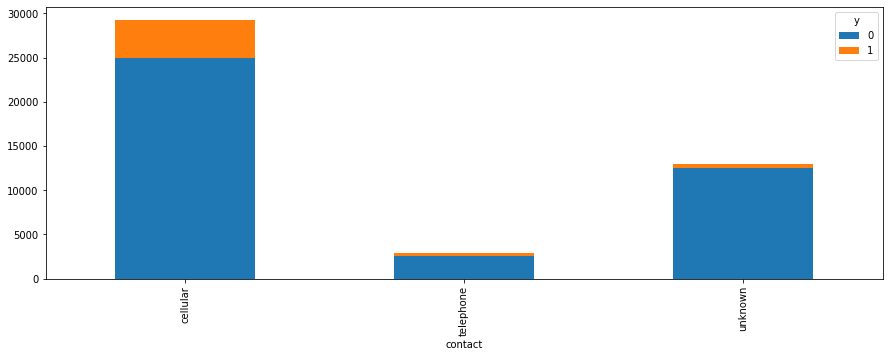

In [54]:
contact_y_df = df.groupby(
    ['contact','y']
    ).agg(
        'count'
        ).reset_index().iloc[:,:3].rename(
            columns={'age':'count'}
            )
print(contact_y_df)            
contact_y_df.pivot_table(
    index='contact', columns='y', values='count'
    ).plot.bar(stacked=True, figsize = (15,5))